# WeatherPy
Code for assignment

In [253]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [254]:
# Set the API base URL
BASE_URL = "http://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key 

### Generate the Cities List by Using the `citipy` Library

In [255]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [256]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = BASE_URL + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather_response = requests.get(city_url)
        city_weather_json = city_weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_json["coord"]["lat"]
        city_lng = city_weather_json["coord"]["lon"]
        city_max_temp = city_weather_json["main"]["temp_max"]
        city_humidity = city_weather_json["main"]["humidity"]
        city_clouds = city_weather_json["clouds"]["all"]
        city_wind = city_weather_json["wind"]["speed"]
        city_country = city_weather_json["sys"]["country"]
        city_date = city_weather_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except KeyError :
        print(f"City {city} not found. Skipping...")
        
              
 #Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | isafjordur
Processing Record 2 of Set 1 | port mathurin
Processing Record 3 of Set 1 | monte carmelo
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | saratamata
City saratamata not found. Skipping...
Processing Record 8 of Set 1 | balti
Processing Record 9 of Set 1 | crookston
Processing Record 10 of Set 1 | carnarvon
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | lorengau
Processing Record 14 of Set 1 | usogorsk
Processing Record 15 of Set 1 | mogadishu
Processing Record 16 of Set 1 | edinburgh of the seven seas
Processing Record 17 of Set 1 | 'ain el hadjel
City 'ain el hadjel not found. Skipping...
Processing Record 18 of Set 1 | coahuayana de hidalgo
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 

Processing Record 32 of Set 4 | utrik
Processing Record 33 of Set 4 | magherafelt
Processing Record 34 of Set 4 | lazaro cardenas
Processing Record 35 of Set 4 | muslyumovo
Processing Record 36 of Set 4 | minas de marcona
Processing Record 37 of Set 4 | okhotsk
Processing Record 38 of Set 4 | port sudan
Processing Record 39 of Set 4 | eyl
Processing Record 40 of Set 4 | laojunmiao
Processing Record 41 of Set 4 | happy valley-goose bay
Processing Record 42 of Set 4 | preobrazheniye
Processing Record 43 of Set 4 | berdigestyakh
Processing Record 44 of Set 4 | kapa'a
Processing Record 45 of Set 4 | fort bragg
Processing Record 46 of Set 4 | sur
Processing Record 47 of Set 4 | borba
Processing Record 48 of Set 4 | ta`u
Processing Record 49 of Set 4 | tura
Processing Record 0 of Set 5 | susuman
Processing Record 1 of Set 5 | pasuquin
Processing Record 2 of Set 5 | ishigaki
Processing Record 3 of Set 5 | polyarnyy
Processing Record 4 of Set 5 | bereket
Processing Record 5 of Set 5 | unye
Cit

Processing Record 21 of Set 8 | holualoa
Processing Record 22 of Set 8 | dalandzadgad
Processing Record 23 of Set 8 | kavaratti
Processing Record 24 of Set 8 | vanimo
Processing Record 25 of Set 8 | conception bay south
Processing Record 26 of Set 8 | tobruk
Processing Record 27 of Set 8 | kasongo-lunda
Processing Record 28 of Set 8 | paraiso
Processing Record 29 of Set 8 | vilyuysk
Processing Record 30 of Set 8 | masterton
Processing Record 31 of Set 8 | dom pedro
Processing Record 32 of Set 8 | touros
Processing Record 33 of Set 8 | nantucket
Processing Record 34 of Set 8 | alaghsas
Processing Record 35 of Set 8 | huilong
Processing Record 36 of Set 8 | maitum
Processing Record 37 of Set 8 | vung tau
Processing Record 38 of Set 8 | uturoa
Processing Record 39 of Set 8 | zhanaozen
Processing Record 40 of Set 8 | pokhara
Processing Record 41 of Set 8 | savanna-la-mar
Processing Record 42 of Set 8 | tobelo
Processing Record 43 of Set 8 | albuquerque
Processing Record 44 of Set 8 | nabir

Processing Record 9 of Set 12 | vohipaho
City vohipaho not found. Skipping...
Processing Record 10 of Set 12 | greymouth
Processing Record 11 of Set 12 | cururupu
Processing Record 12 of Set 12 | tshikapa
Processing Record 13 of Set 12 | rundu
Processing Record 14 of Set 12 | viedma
Processing Record 15 of Set 12 | villa alberto andres alvarado aramburo
City villa alberto andres alvarado aramburo not found. Skipping...
Processing Record 16 of Set 12 | funafuti
Processing Record 17 of Set 12 | elverum
Processing Record 18 of Set 12 | ouargla
Processing Record 19 of Set 12 | esmeraldas
Processing Record 20 of Set 12 | lisala
Processing Record 21 of Set 12 | acapulco de juarez
Processing Record 22 of Set 12 | claudio
Processing Record 23 of Set 12 | raja
Processing Record 24 of Set 12 | duki
Processing Record 25 of Set 12 | novodvinsk
Processing Record 26 of Set 12 | kununurra
Processing Record 27 of Set 12 | shunyi
Processing Record 28 of Set 12 | santiago de cao
Processing Record 29 of 

In [257]:
city_data_df = pd.DataFrame(city_data)
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [258]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,isafjordur,66.0755,-23.1240,265.19,73,1,1.81,IS,1707356888
1,port mathurin,-19.6833,63.4167,299.77,79,73,8.36,MU,1707356888
2,monte carmelo,-18.7247,-47.4986,293.86,89,100,1.43,BR,1707356889
3,adamstown,-25.0660,-130.1015,297.87,79,100,6.23,PN,1707356889
4,port-aux-francais,-49.3500,70.2167,277.75,76,80,13.13,TF,1707356685


In [259]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [260]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,isafjordur,66.0755,-23.1240,265.19,73,1,1.81,IS,1707356888
1,port mathurin,-19.6833,63.4167,299.77,79,73,8.36,MU,1707356888
2,monte carmelo,-18.7247,-47.4986,293.86,89,100,1.43,BR,1707356889
3,adamstown,-25.0660,-130.1015,297.87,79,100,6.23,PN,1707356889
4,port-aux-francais,-49.3500,70.2167,277.75,76,80,13.13,TF,1707356685


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

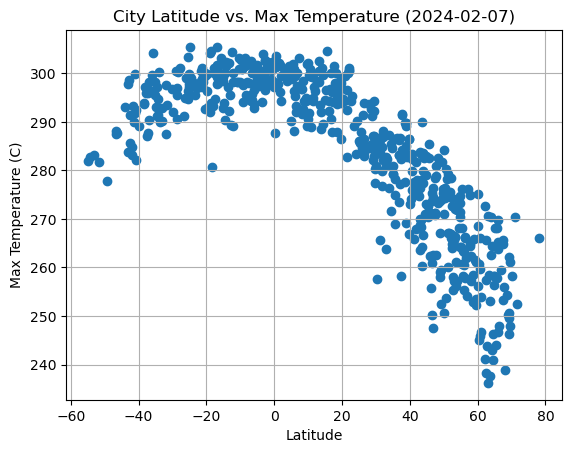

In [277]:
# Build scatter plot for latitude vs. temperature
latitude= city_data_df["Lat"]
max_temp = city_data_df["Max Temp"]

# Incorporate the other graph properties
plt.scatter(latitude,max_temp)
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

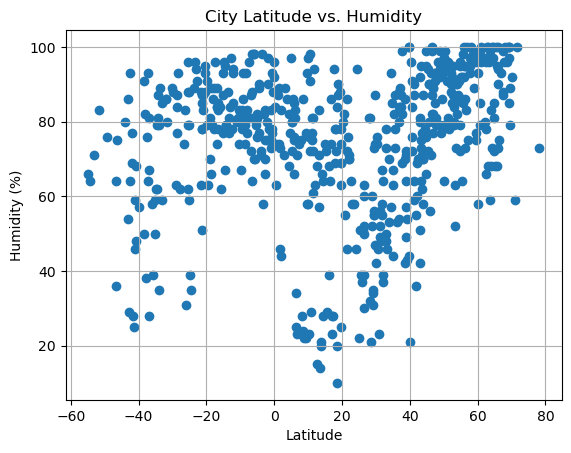

In [262]:
# Build the scatter plots for latitude vs. humidity
latitude= city_data_df["Lat"]
humidity = city_data_df["Humidity"]

# Incorporate the other graph properties
plt.scatter(latitude,humidity)
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

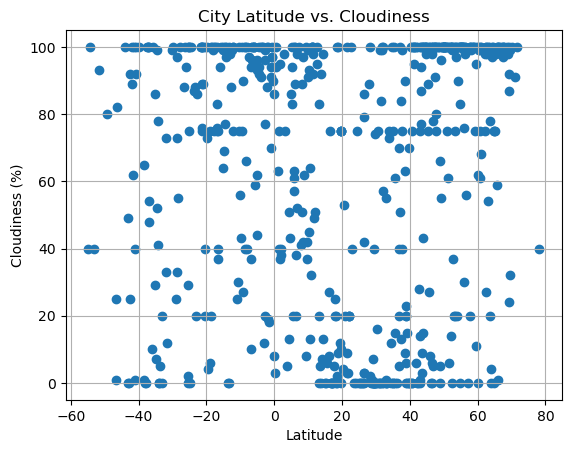

In [263]:
# Build the scatter plots for latitude vs. cloudiness
latitude= city_data_df["Lat"]
cloudy = city_data_df["Cloudiness"]

# Incorporate the other graph properties
plt.scatter(latitude,cloudy)
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

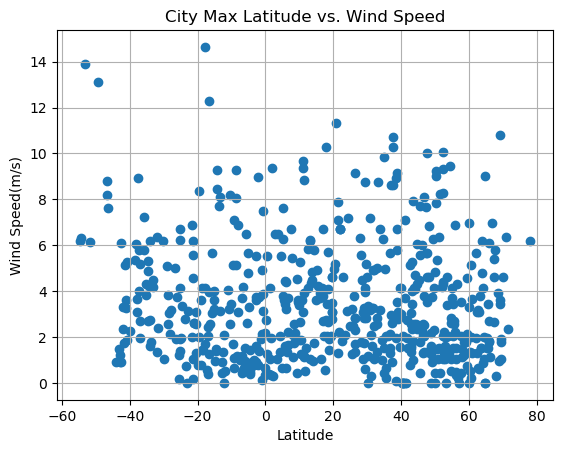

In [264]:
# Build the scatter plots for latitude vs. wind speed
latitude= city_data_df["Lat"]
wind = city_data_df["Wind Speed"]

# Incorporate the other graph properties
plt.scatter(latitude,wind)
plt.title("City Max Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [265]:
# Define a function to create Linear Regression plots

def plot_lin_reg(x, y, x_label, y_label, title):
 
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Incorporate the other graph properties
    plt.scatter(x,y, edgecolors ="k")
    plt.plot(x,regress_values,"r-")
    x_loc = (max(x)-min(x))*0.5 + min(x)
    y_loc = (max(y)-min(y))*0.5 + min(y)
    plt.annotate(line_eq,(x_loc,y_loc),fontsize=15,color="red")
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid()
    print(f"The r-value is:{round(rvalue**2,2)}")

In [266]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,isafjordur,66.0755,-23.1240,265.19,73,1,1.81,IS,1707356888
6,balti,47.7617,27.9289,280.84,79,80,3.53,MD,1707356889
7,crookston,47.7741,-96.6081,278.76,81,100,4.63,US,1707356889
12,usogorsk,63.4106,48.6872,258.52,96,100,3.79,RU,1707356890
13,mogadishu,2.0371,45.3438,299.44,83,40,9.37,SO,1707356890


In [267]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port mathurin,-19.6833,63.4167,299.77,79,73,8.36,MU,1707356888
2,monte carmelo,-18.7247,-47.4986,293.86,89,100,1.43,BR,1707356889
3,adamstown,-25.0660,-130.1015,297.87,79,100,6.23,PN,1707356889
4,port-aux-francais,-49.3500,70.2167,277.75,76,80,13.13,TF,1707356685
5,grytviken,-54.2811,-36.5092,282.65,64,100,6.32,GS,1707356889


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:0.77


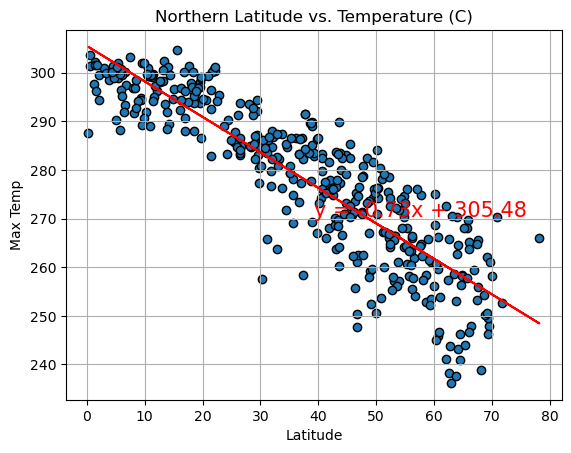

In [268]:
# Linear regression on Northern Hemisphere
plot_lin_reg(x=northern_hemi_df["Lat"], 
             y=northern_hemi_df["Max Temp"],
             x_label='Latitude', y_label="Max Temp", title="Northern Latitude vs. Temperature (C)")

The r-value is:0.38


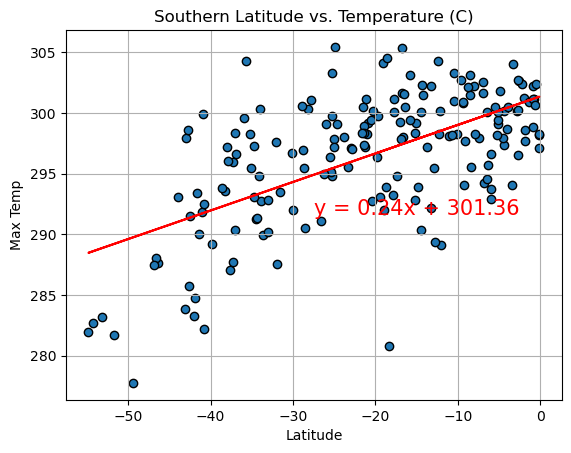

In [269]:
# Linear regression on Southern Hemisphere
plot_lin_reg(x=southern_hemi_df["Lat"], 
             y=southern_hemi_df["Max Temp"],
             x_label='Latitude', y_label="Max Temp", title="Southern Latitude vs. Temperature (C)")

**Discussion about the linear relationship:** positive relationship between Max temp and latitude. Northern hemisphere correlation is stronger than souther for this relationship, which makes sense because the southern hemisphere is mostly water and temperatures changes are slower than land. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is:0.22


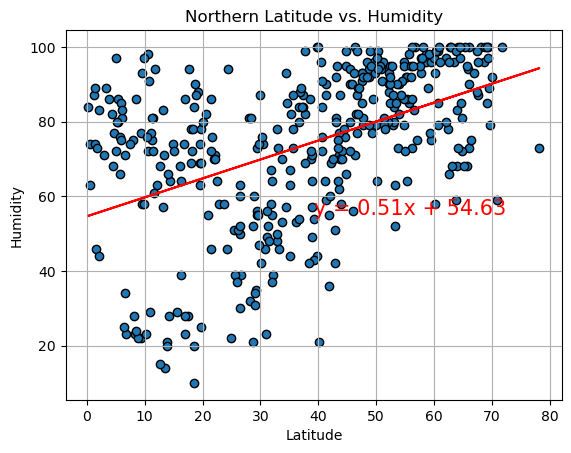

In [270]:
# Northern Hemisphere
plot_lin_reg(x=northern_hemi_df["Lat"], 
             y=northern_hemi_df["Humidity"],
             x_label='Latitude', y_label="Humidity", title="Northern Latitude vs. Humidity")

The r-value is:0.17


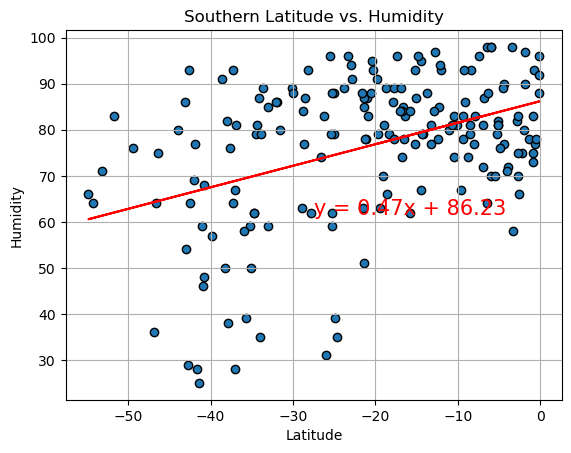

In [271]:
# Southern Hemisphere
plot_lin_reg(x=southern_hemi_df["Lat"], 
             y=southern_hemi_df["Humidity"],
             x_label='Latitude', y_label="Humidity", title="Southern Latitude vs. Humidity")

**Discussion about the linear relationship:** positive relationship between latitude and humidity for both hemispheres, but not strong

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:0.09


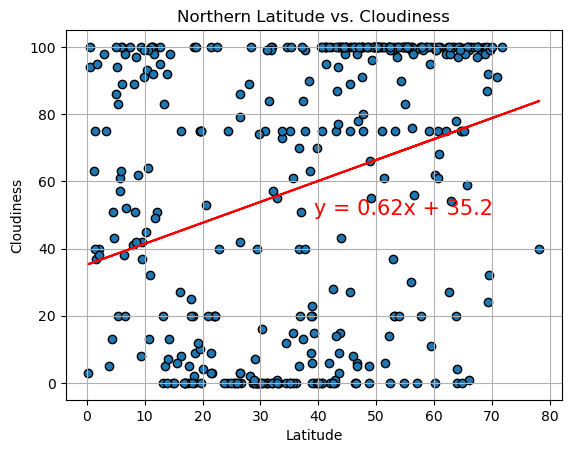

In [272]:
# Northern Hemisphere
plot_lin_reg(x=northern_hemi_df["Lat"], 
             y=northern_hemi_df["Cloudiness"],
             x_label='Latitude', y_label="Cloudiness", title="Northern Latitude vs. Cloudiness")

The r-value is:0.06


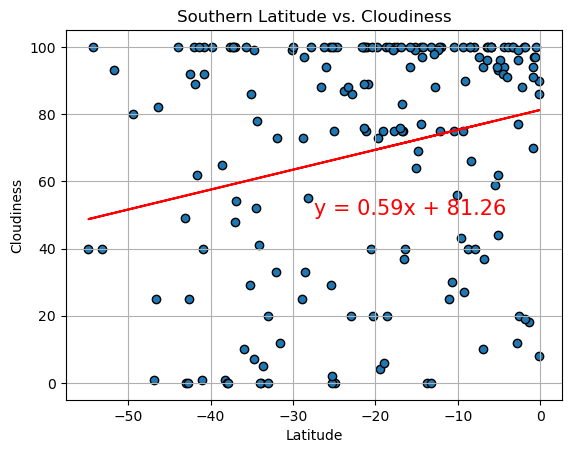

In [273]:
# Southern Hemisphere
plot_lin_reg(x=southern_hemi_df["Lat"], 
             y=southern_hemi_df["Cloudiness"],
             x_label='Latitude', y_label="Cloudiness", title="Southern Latitude vs. Cloudiness")

**Discussion about the linear relationship:** Positive relationship between Cloudiness and latitude for both hemispheres, but weak correlation. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:0.01


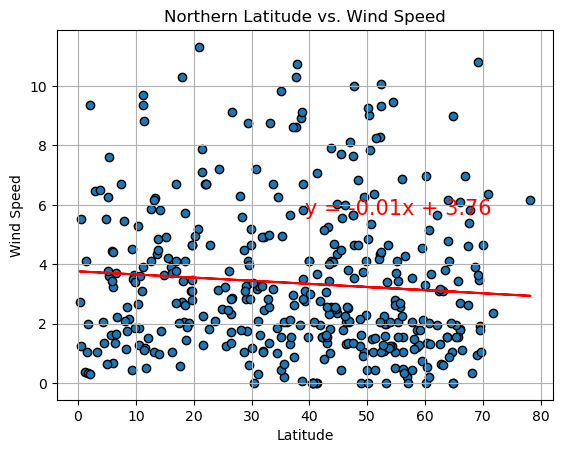

In [274]:
# Northern Hemisphere
plot_lin_reg(x=northern_hemi_df["Lat"], 
             y=northern_hemi_df["Wind Speed"],
             x_label='Latitude', y_label="Wind Speed", title="Northern Latitude vs. Wind Speed")

The r-value is:0.07


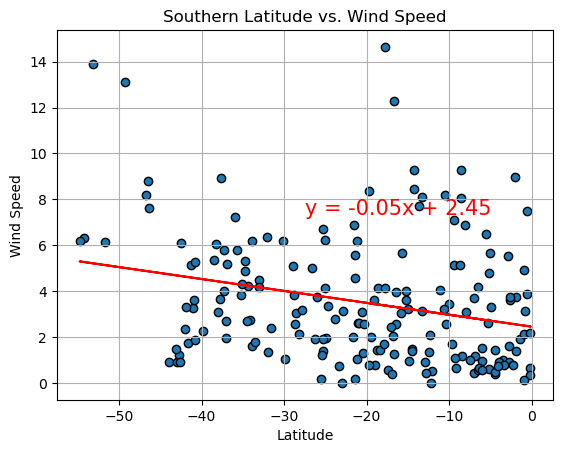

In [275]:
# Southern Hemisphere
plot_lin_reg(x=southern_hemi_df["Lat"], 
             y=southern_hemi_df["Wind Speed"],
             x_label='Latitude', y_label="Wind Speed", title="Southern Latitude vs. Wind Speed")

**Discussion about the linear relationship:** Very weak to almost no linear relationship between wind speed and latitude for both northern and southern hemispheres. 